# Lab: Linear Programming

Lab associated with Module 9: Linear Programming

***

In [1]:
# The following lines are used to increase the width of cells to utilize more space on the screen 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

***

### Section 0: Imports

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

***

### Section 1: Solving LP problem graphically

Let us see if we can solve the LP problem that we discussed in the lecture, graphically

In [4]:
X1 = np.linspace(0, 1000)

In [5]:
# X1 + X2 >= 200
# X2 = 200 - X1
X2 = 200 - X1

In [6]:
#2X1 + 3X2 <= 120
#X2 = (120 - 2X1)/2

In [7]:
X2x = X1[np.where(X2 > 0)[0]]
X2y = X2[np.where(X2 > 0)[0]]

In [8]:
# 9X1 + 6X2 <= 1556
# X2 = (1556 - 9X1)/6

X3 = (1556 - 9*X1)/6

X3x = X1[np.where(X3 > 0)[0]]
X3y = X3[np.where(X3 > 0)[0]]

In [9]:
# 12X1 + 16X2 <= 2880
# X2 = (2880 - 12X1)/16

X4 = (2880 - 12*X1)/16

X4x = X1[np.where(X4 > 0)[0]]
X4y = X4[np.where(X4 > 0)[0]]

Let us plot these constraints

Text(0, 0.5, 'X2')

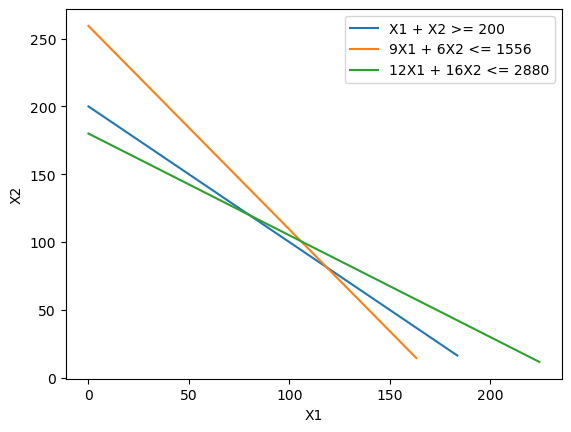

In [10]:
plt.plot(X2x, X2y, label=r'$2y\leq25-x$')
plt.plot(X3x, X3y, label=r'$2y\leq25-x$')
plt.plot(X4x, X4y, label=r'$2y\leq25-x$')

plt.legend(['X1 + X2 >= 200', '9X1 + 6X2 <= 1556', '12X1 + 16X2 <= 2880'])
plt.xlabel('X1')
plt.ylabel('X2')

Let us see if we can plot the feasible region

Text(0, 0.5, 'X2')

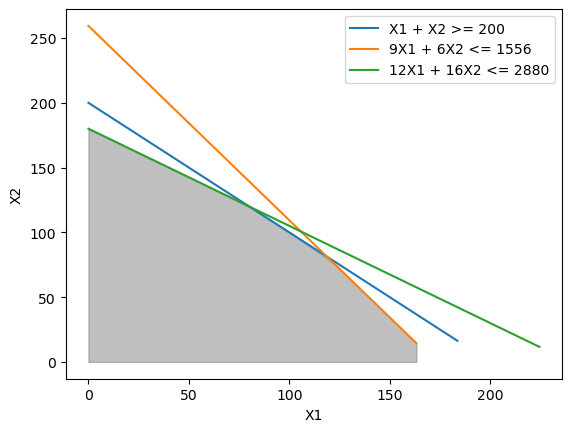

In [11]:
plt.plot(X2x, X2y, label=r'$2y\leq25-x$')
plt.plot(X3x, X3y, label=r'$2y\leq25-x$')
plt.plot(X4x, X4y, label=r'$2y\leq25-x$')

# Fill feasible region
y5 = np.minimum(X2y[0:9], X3y)
y6 = np.minimum(y5, X4y[0:9])
plt.fill_between(X4x[0:9], y6, color='grey', alpha=0.5)

plt.legend(['X1 + X2 >= 200', '9X1 + 6X2 <= 1556', '12X1 + 16X2 <= 2880'])
plt.xlabel('X1')
plt.ylabel('X2')

Okay, now we have the constraints, let us see if we can plot the various values of objective function

Text(0, 0.5, 'X2')

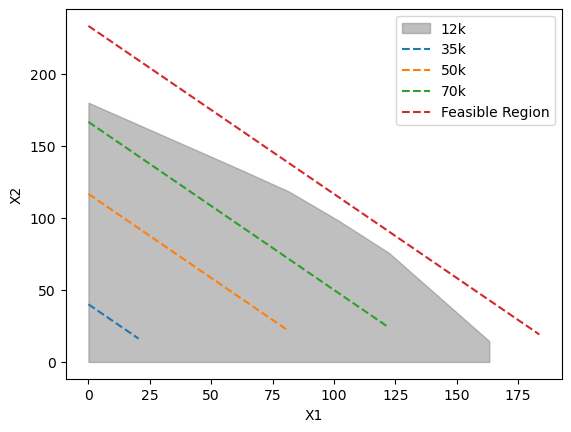

In [12]:
# 350X1 + 300X2
# X2 = (N - 350X1)/300
N1 = 12000
N2 = 35000
N3 = 50000
N4 = 70000

X5_1 = (N1 - 350*X1)/300
X5_2 = (N2 - 350*X1)/300
X5_3 = (N3 - 350*X1)/300
X5_4 = (N4 - 350*X1)/300

# Fill feasible region
y5 = np.minimum(X2y[0:9], X3y)
y6 = np.minimum(y5, X4y[0:9])
plt.fill_between(X4x[0:9], y6, color='grey', alpha=0.5)

# No need to plot the constraints

#plt.plot(X2x, X2y, label=r'$2y\leq25-x$')
#plt.plot(X3x, X3y, label=r'$2y\leq25-x$')
#plt.plot(X4x, X4y, label=r'$2y\leq25-x$')

X5_1x = X1[np.where(X5_1 > 0)[0]]
X5_1y = X5_1[np.where(X5_1 > 0)[0]]

X5_2x = X1[np.where(X5_2 > 0)[0]]
X5_2y = X5_2[np.where(X5_2 > 0)[0]]

X5_3x = X1[np.where(X5_3 > 0)[0]]
X5_3y = X5_3[np.where(X5_3 > 0)[0]]

X5_4x = X1[np.where(X5_4 > 0)[0]]
X5_4y = X5_4[np.where(X5_4 > 0)[0]]

plt.plot(X5_1x, X5_1y, '--', label=r'$2y\leq25-x$')
plt.plot(X5_2x, X5_2y, '--', label=r'$2y\leq25-x$')
plt.plot(X5_3x, X5_3y, '--', label=r'$2y\leq25-x$')
plt.plot(X5_4x, X5_4y, '--', label=r'$2y\leq25-x$')

plt.legend(['12k', '35k', '50k', '70k','Feasible Region'])
plt.xlabel('X1')
plt.ylabel('X2')

### <font color='red'> Activity 1: Write code for solving a system of linear equations in form of y = Ax. Note, you should use LU decomposition algorithm that we discussed in the lecture, and then use forward and backward substitution to find a value of x. </font>

In [18]:
import numpy as np

# LU Decomposition
def LUDecomposition(A):
    n = len(A) #Get size of matrix A
    L = np.zeros((n, n)) #Initialize  nxn matrix L with zeros
    U = np.zeros((n, n)) #Initialize  nxn matrix U with zeros

    for i in range(n): #Fills L's diagonal with ones
        L[i][i] = 1
    
    #LU decomposition
    for k in range(n):
        U[k][k] = A[k][k]  #Inputs the diagonal value of A in U
        for i in range(k + 1, n): #Fills the rest of the row in U
            U[k][i] = A[k][i]  
        
        for i in range(k + 1, n): #Inputs values in k column in L
            L[i][k] = A[i][k] / U[k][k] #Caluculates L's entries

        #Updates A
        for i in range(k + 1, n): #Loops through each row i below pivot
            for j in range(k + 1, n): #Loops through each column j to the right of the pivot column
                A[i][j] = A[i][j] - L[i][k] * U[k][j] #Subtract scaled row from A

    return L, U #Returns lower and upper matrices


def ForwardSub(L, b):
    n = len(b) #Get size of vector b
    a = [0 for _ in range(n)]
    
    for i in range(n): # Calculate the current value of a[i] by subtracting the known terms from b[i]
        a[i] = (b[i] - np.dot(a[:i], L[i][:i])) 
    
    return a


def BackwardSub(U, y):
    n = len(y)
    a = [0 for _ in range(n)]
    
    for i in range(n-1, -1, -1):
        a[i] = (y[i] - np.dot(a[i+1:], U[i][i+1:])) / U[i][i]  
    
    return a




def solveSystemLinearEquations(A, y):
    
    # Perform LU Decomposition
    L, U = LUDecomposition(A)
    
    # Display L and U matrices
    print("Lower Triangular Matrix L:\n", L)
    print("Upper Triangular Matrix U:\n", U)
    
    # Forward substitution
    y_temp = ForwardSub(L, y)
    
    # Backward substitution 
    x = BackwardSub(U, y_temp)
    
    return x

# Given matrix A and vector y
A = np.array([[2, 3, 1, 5],
              [6, 13, 5, 19],
              [2, 19, 10, 23],
              [4, 10, 11, 31]])

y = np.array([1, 2, 3, 4])

# Solving for x
x = solveSystemLinearEquations(A, y)
print("Solution x:", x)


Lower Triangular Matrix L:
 [[1. 0. 0. 0.]
 [3. 1. 0. 0.]
 [1. 4. 1. 0.]
 [2. 1. 7. 1.]]
Upper Triangular Matrix U:
 [[2. 3. 1. 5.]
 [0. 4. 2. 4.]
 [0. 0. 1. 2.]
 [0. 0. 0. 3.]]
Solution x: [21.875, -3.25, 32.0, -13.0]


### <font color='green'> Rough work for activity 1. </font>

In [13]:
# LU Decompostion Pseudo-code

n = 4
#A = [[0 for i in range(0,n)] for i in range(0, n)]
A = [[2, 3, 1, 5], [6, 13, 5, 19], [2, 19, 10, 23], [4, 10, 11, 31]]
L = [[0 for i in range(0,n)] for i in range(0, n)] # Take care of initialization of L
U = [[0 for i in range(0,n)] for i in range(0, n)]

for k in range(0, n):
    
    U[k][k] = A[k][k]
    
    for i in range(k+1, n):
        L[i][k] = A[i][k] / U[k][k]


In [14]:
L

[[0, 0, 0, 0],
 [3.0, 0, 0, 0],
 [1.0, 1.4615384615384615, 0, 0],
 [2.0, 0.7692307692307693, 1.1, 0]]

In [15]:
# Forward Substitution (Strategy)
# La = b

L = [[1,    0,   0,  0]
     [l11,  1,   0,  0]
     [l21, l22,  1,  0]
     [l31, l32, l33, 1]]

a = [a1, a2, a3, a4] # Not Given

b = [b1, b2, b3, b4] # Given

# First case
1* a1 = b1
a1 = b1

# Second case

l11 * a1 + 1 * a2 = b2
a2 = b2 - (l11 * a1)

# Third case

l21 * a1 + l22 * a2 + 1 * a3 = b3 
a3 = b3 - (l21 * a1 + l22 * a2)

# Fourt case
l31 * a1 + l32 * a2 + l33 * a3 + 1 * a4 = b4
a4 = b4 - (l31 * a1 + l32 * a2 + l33 * a3)






SyntaxError: cannot assign to operator (2913453853.py, line 14)

In [16]:
def ForwardSub(L, b):
    
    n = len(b)
    
    a = [0 for i in range(0, n)]
    
    for i in range(0, n):
        a[i] = b[i] - np.dot(a, L[i])
        
    return a

In [17]:
# backward Substitution

    for i in range(n-1, -1, 0):
        a[i] = (b[i] - np.dot(a, U[i]))/U[i][i]

IndentationError: unexpected indent (1131243144.py, line 3)

In [18]:
A = np.array([1, 2, 3, 4])
B = np.array([2, 3, 4, 5])

1 * 2 + 2 * 3 + 3 * 4 + 4 * 5

np.dot(A, B)

A.dot(B)

40

In [19]:
np.dot(A, B)

40

In [20]:
A.dot(B)

40

***